# <center>Day-2 Practical Session, 26 May 2021</center>
## <center>Part 2: BIGS-IWE strategy for Line Intercept Sampling (LIS)</center>
#### <center> *Li-Chun Zhang*<sup>1,2,3</sup> and *Melike Oguz-Alper*<sup>2</sup> </center>
  
##### <center> <sup>1</sup>*University of Southampton (L.Zhang@soton.ac.uk)*, <sup>2</sup>*Statistics Norway*, <sup>3</sup>*University of Oslo* </center>
***

In this illustration, we will apply BIGS-IWE strategy to line-intercept sampling (LIS) which is a method of habitat sampling in a given area, where a habitat is sampled if a chosen line segment transects it. An example of LIS is given by Becker (1991). The sketch of the observed tracks can be obtained by compiling R-function <font color=green>**skthLISBecker**</font>. Visualisation of the BIG constructed based on the observed line-intercept samples can be obtained by using R-function <font color=green>**skthLISBeckerBIG**</font>.

***
#### Description of the population and sampling strategies
* Population BIG: $\mathcal{B}=(F,\Omega;H)$, where $\Omega$ consists of all wolverine tracks in the region of interest, $F$ contains the corresponding projection segments, and $H$ consist of edges between the tracks and the segments, i.e. $(i\kappa)\in H$ for $i\in F$ and $\kappa \in \Omega$  
    * **NB**.   $\mathcal{B}$ cannot be consructed unless the whole area observed
* Observed BIG: $\mathcal{B}^*=(F^*,\Omega_s;H^*)$, where $\Omega_s$ contains the observed wolverine tracks, $F^*$ contain the projection segments constructed based on the actual samples $s$ and $\Omega_s$, and $H^*$ consists of the incident observational links from $F^*$ to $\Omega_s$
* $\beta_{\kappa}^*$: *ancestry* set of $\kappa \in \Omega_s$ in $\mathcal{B}^*$ and $\alpha_i^*$: *successors* of $i \in F^*$ in $\mathcal{B}^*$ 
* Four systematic samples, A, B, C and D,  each containing three positions drawn on the baseline. Equal distances of $12$ miles between each position in a given draw
* Four wolverine tracks observed: $\Omega_s=\{\kappa_1,\kappa_2,\kappa_3,\kappa_4\}$; $y_\kappa= (1,2,2,1)^\top$ and $L_\kappa=(5.25,7.5,2.4,7.05)^\top$
* The baseline divided into seven projection segments given the tracks: $F^*=\{i_1,i_2,i_3,i_4,i_5,i_6,i_7\}$
* The probability that the $i$th segment selected under systematic sampling: $p_i=x_i/12$, where $\mathbf{x}=(5.25,2.25,x_3,2.4,x_5,7.05,x_7)^\top$
* We have $s_1=s_2=\{i_1,i_5,i_6\}$, yielding $\Omega_s=\{\kappa_1,\kappa_2,\kappa_4\}$, and $s_3=s_4=\{i_4,i_6,i_7\}$, yielding $\Omega_s=\{\kappa_3,\kappa_4\}$
*** 

#### Formula sheet
* The parameter of interest: total number of wolverines in the region of interest

    $\theta=\sum_{\kappa\in\Omega}y_{\kappa}$, where $y_{\kappa}$ number of wolverines in track $\kappa$

* Hansen-Hurwitz (HH) type estimators on the $r$th draw

    $\hat{\theta}_r =  \sum_{i\in s_r}\frac{z_i}{p_i}$, where $z_i=\sum_{\kappa \in\alpha_i^*}w_{i\kappa}y_{\kappa}$

    * *Multiplicity* estimator; equal weights
    
        $w_{i\kappa}\equiv \frac{1}{\mid\beta_{\kappa}^*\mid}$
    
    * HH-type estimator with *unequal* weights: *probability and inverse degree-adjusted (PIDA) weights*
     
        $w_{i\kappa}=\frac{p_i}{\mid\alpha_i^*\mid^{\gamma}}\big(\sum_{i \in \beta_{\kappa}^*}\frac{p_i}{\mid\alpha_i^*\mid^{\gamma}}\big)^{-1}$, $\gamma \geq 0$
        
**NB**. When $\gamma=0$, PIDA weights reduce to $w_{i\kappa}=p_i/p_{(\kappa)}$, where $p_{(\kappa)}=\sum_{i \in \beta_{\kappa}^*}p_i$

* HH-type estimators over all the draws

    $\hat{\theta}=\frac{1}{4}\sum_{r=1}^4\hat{\theta}_r$
    
* Variance estimator of the HH-type estimators over all the draws

    $\hat{\mathrm{V}}(\hat{\theta})=\frac{1}{4}\frac{\sum_{r=1}^4(\hat{\theta}_r-\hat{\theta})^2}{r-1}$
    
***

**NB**. R-package **igraph** has to be installed before running R-functions below that generates bipartite graphs.

***

#### Description of R-function <font color=green>**skthLISBeckerBIG**</font>
##### 1. Function parameters
* **showplot**: Use <font color=blue>**TRUE**</font> to get the skecth of BIG; default <font color=blue>**FALSE**</font>

##### 2. Main steps of the function
* A bipartite graph constructed based on the observed wolverine tracks and the sample line segments transecting them. R-package **igraph** used to generate the graph

##### 3. Main outputs of the function
* BIG plot shown if **showplot**=  <font color=blue>**TRUE**</font>
* The bipartite graph generated is returned as a graph object. It shall be called via **$G**

#### Description of R-function <font color=green>**zLISBecker**</font>
##### 1. Function parameters
* **graphstar**: graph to be used: the output of <font color=green>**skthLISBeckerBIG**</font>
* **coefgamma**: coefficient to be used in the HH-type estimator with PIDA weights; default value $0$. No effect of the choice if **multiplicity**= <font color=blue>**TRUE**</font>
* **probi**: a vector of the selection probabilities of the constructed projection segments
* **multiplicity**: Use <font color=blue>**TRUE**</font> to get $z_i$ values based on equal weights, i.e. $w_{i\kappa}=\mid\beta_{\kappa}^*\mid^{-1}$; default <font color=blue>**FALSE**</font>

##### 2. Main steps of the function
* Edge set derived from the input graph, as well as the labels of the vertices in $F^*$ and $\Omega_s$
* $\mid \alpha_i^* \mid$ and $\mid \beta_{\kappa}^*\mid$ calculated based on the edge set
* $z_i$ values calculated for all $i\in F^*$ for chosen values of $\gamma$

##### 3. Main outputs of the function
* $z_i$ values returned

#### Description of R-function <font color=green>**mainLISBecker**</font>
##### 1. Function parameters
* **graphstar**: graph to be used: the output of <font color=green>**skthLISBeckerBIG**</font>
* **coefgamma**: coefficient to be used in the HH-type estimator with PIDA weights; default value $0$. No effect of the choice if **multiplicity**= <font color=blue>**TRUE**</font>
* **probi**: a vector of the selection probabilities of the constructed projection segments
* **multiplicity**: Use <font color=blue>**TRUE**</font> to get $z_i$ values based on equal weights, i.e. $w_{i\kappa}=\mid\beta_{\kappa}^*\mid^{-1}$; default <font color=blue>**FALSE**</font>
* **showcat**: Use <font color=blue>**FALSE**</font> to avoid printing outputs from the *cat* function in R; default <font color=blue>**TRUE**</font>

##### 2. Main steps of the function
* Edge set derived from the input graph
* $\mid \alpha_i^* \mid$ and $\mid \beta_{\kappa}^*\mid$ calculated based on the edge set
* $z_i$ values obtained by calling function <font color=green>**zLISBecker**</font>
* For each draw under systematic sampling, estimates obtained by using the HH-type estimator.
* The HH-type estimator over all draws applied by taking the average of the estimates. Variance of the estimator calculated

##### 3. Main outputs of the function
* An estimate for the total number of wolverine tracks in the given area and its estimated variance. Variance estimate can be called via **$varest** for further analysis.

***

In [27]:
# load R-package igraph
library(igraph)

In [28]:
# Skecth of the wolverine tracks, Becker (1991)
skthLISBecker <- function()
{
  plot(0,xaxt="n",yaxt="n",type="l",ylab="",xlab="Baseline",xlim=c(0,120),ylim=c(0,60),bty="n")
  lines(c(0,0),c(0,60)); lines(c(0,120),c(0,0)); lines(c(0,120),c(60,60)); lines(c(120,120),c(0,60))
  lines(c(0,10,12,19),c(40,40,36,42),lty=2); text(19,45,labels="k1") 
  lines(c(0,5,15,25),c(15,18,14,18),lty=2); text(20,12,labels="k2") 
  lines(c(31,34,38),c(25,30,20),lty=2); text(29,30,labels="k3") 
  lines(c(75,68,85,90),c(10,15,20,15),lty=2); text(86,23,labels="k4") 
  abline(v=c(2,42,82)); text(2,4,label="A1"); text(42,4,label="A2"); text(82,4,label="A3")
  abline(v=c(10,50,90)); text(10,1,label="B1"); text(50,1,label="B2"); text(90,1,label="B3")
  abline(v=c(35,75,115)); text(35,3,label="C1"); text(75,3,label="C2"); text(115,3,label="C3")
  abline(v=c(38,78,118)); text(38,-1,label="D1"); text(78,-1,label="D2"); text(118,-1,label="D3")

}

In [29]:
# Skecth of BIG representation of LIS, Becker (1991)
skthLISBeckerBIG <- function(showplot=FALSE)
{
  # Projection of wolverine tracks on the baseline; 
  # Areas without tracks assigned length of 1
  idx_F <- paste('i',1:7,sep='')
  idx_omega <- paste('k',1:4,sep='')
  edgeik <- data.frame(i=c('i1','i1','i2','i4','i6'),k=c('k1','k2','k2','k3','k4'))
  g <- graph_from_data_frame(edgeik, directed = TRUE)
  g <- add_vertices(g,3,attr=list(name=c('i3','i5','i7')))

  # Apply bipartite layout
  LO_bipart <- layout_as_bipartite(g,types=bipartite_mapping(g)$type)
  LO_bipart[bipartite_mapping(g)$type==FALSE,2] <- 0
  LO_bipart[bipartite_mapping(g)$type==TRUE,2] <- 1
  
  nodecolor <- rep("yellow",length(V(g)))
  nodecolor[bipartite_mapping(g)$type==TRUE] <- "orange"
  
  # Plot BIG
  if(showplot){
    plot(g, vertex.label=V(g)$name, vertex.size=10,vertex.label.dist=0,vertex.label.cex=1.25,
         vertex.color=nodecolor, layout=LO_bipart[,2:1]) }

return(list(G=g))  
}

In [30]:
# zi-values
zLISBecker <- function(graphstar,coefgamma=0,probi,multiplicity=FALSE){
  edgeik <- data.frame(as_edgelist(graphstar))
  colnames(edgeik) <- c('i','k')
  idx_F <- as_ids(V(graphstar)[bipartite.mapping(graphstar)$type==FALSE])
  idx_F <- idx_F[order(idx_F)]
  idx_omega <- as_ids(V(graphstar)[bipartite.mapping(graphstar)$type==TRUE])
  card_alphai <- NULL
  for(i in idx_F){
    card_alphai <- c(card_alphai,sum(edgeik$i %in% i))  
  }
  
  card_betak <- NULL
  for(k in idx_omega){
    card_betak <- c(card_betak,sum(edgeik$k %in% k))  
  }
  yk <- c(1,2,2,1)
  zi <-  NULL
  for(i in idx_F){
    if(i %in% edgeik$i){
      tmp.k <- edgeik$k[edgeik$i %in% i]
      if(multiplicity){tmp.zi <- sum(yk[idx_omega %in% tmp.k]/card_betak[idx_omega %in% tmp.k])}
      if(!multiplicity){
        tmp.zi <- 0
        for(k in tmp.k){
          betak <- edgeik$i[edgeik$k %in% k]
          wik <- (probi[idx_F==i]*(1/(card_alphai[idx_F==i])^coefgamma)/(sum(probi[idx_F %in% betak]*(1/card_alphai[idx_F %in% betak])^coefgamma)))
          tmp.zi <- tmp.zi + yk[idx_omega==k]*wik
        }
      }
    }
    if(!(i %in% edgeik$i)){
      tmp.zi <- 0}
    zi <- c(zi,tmp.zi)
  }
  return(zi)
}

In [31]:
# HH-estimators over all draws
mainLISBecker <- function(graphstar,coefgamma=0,probi,multiplicity=FALSE,showcat=TRUE){
  edgeik <- data.frame(as_edgelist(graphstar))
  colnames(edgeik) <- c('i','k')
  idx_F <- as_ids(V(graphstar)[bipartite.mapping(graphstar)$type==FALSE])
  idx_F <- idx_F[order(idx_F)]
  idx_omega <- as_ids(V(graphstar)[bipartite.mapping(graphstar)$type==TRUE])

all.subsets <- list(c(1,5,6),c(1,5,6),c(4,6,7),c(4,6,7))
B <- length(all.subsets)

# Estimates over random samples
  YhatHH_alpha <- NULL
  for(b in 1:B){
    s0 <- idx_F[all.subsets[[b]]]
    s1 <- unique(edgeik$k[edgeik$i %in% s0])
    zi_alpha <- zLISBecker(graphstar,coefgamma,probi,multiplicity = multiplicity)
    YhatHH_alpha <- c(YhatHH_alpha,sum(zi_alpha[idx_F %in% s0]/probi[idx_F %in% s0])) 
  }

if(showcat){
  cat('g:',coefgamma,'\t','zi:',zi_alpha,"\n")
  
  cat("Estimate per draw: ",YhatHH_alpha, "\n")
  cat("(Estimate over all draws,VarEst): ",mean(YhatHH_alpha), '\t',var(YhatHH_alpha)/B, "\n")
}
  return(list(varest=var(YhatHH_alpha)/B))
}  

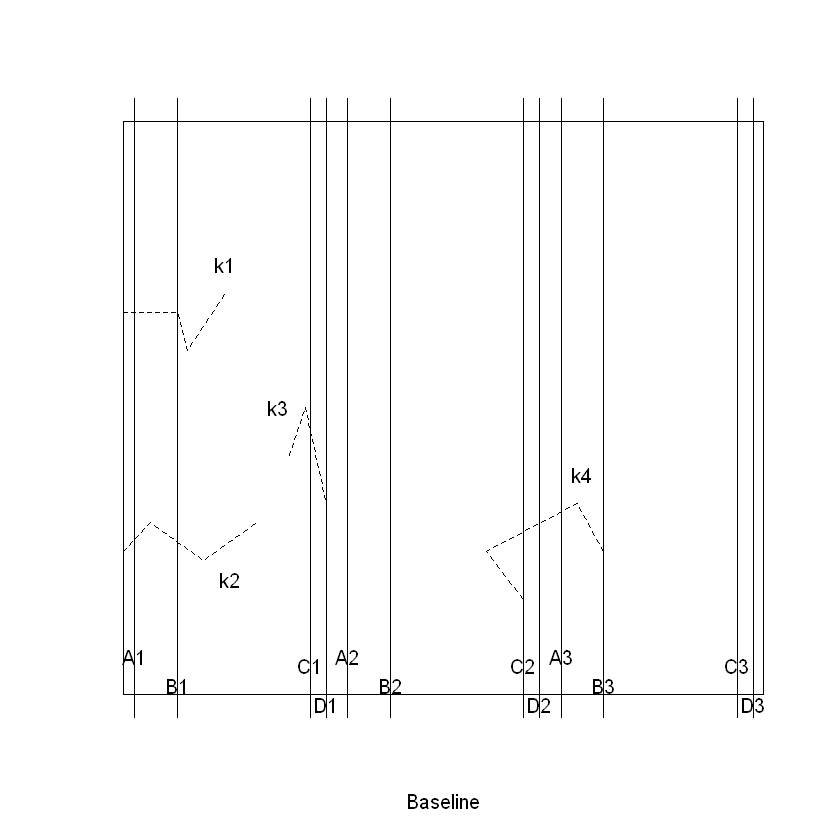

$G
IGRAPH f450c81 DN-- 11 5 -- 
+ attr: name (v/c)
+ edges from f450c81 (vertex names):
[1] i1->k1 i1->k2 i2->k2 i4->k3 i6->k4


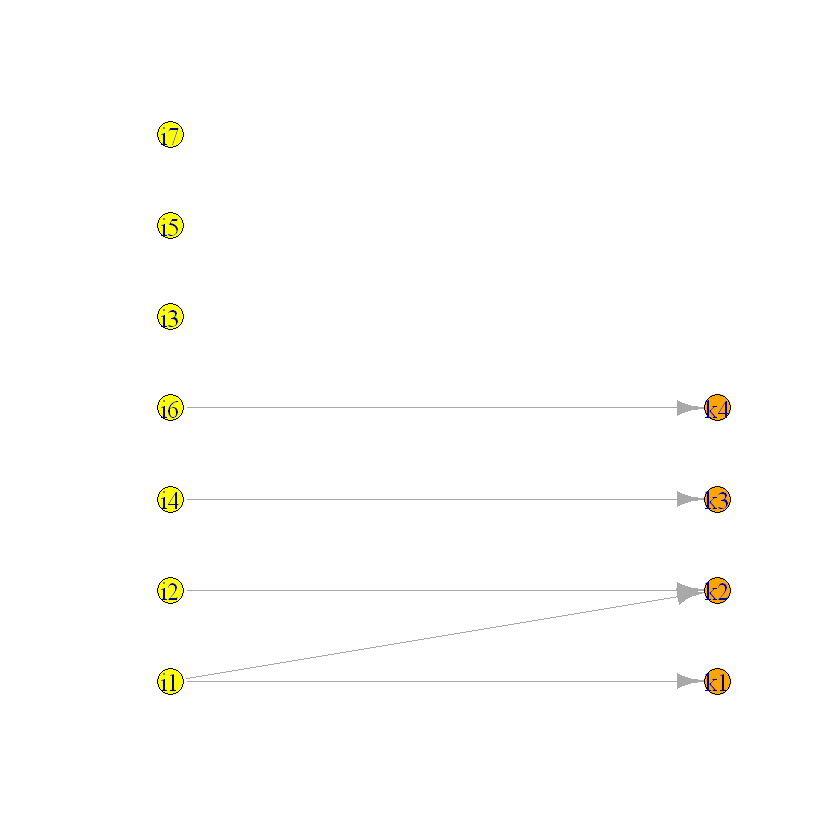

In [32]:
skthLISBecker()
skthLISBeckerBIG(showplot=TRUE)

In [33]:
# Generate the graph based on observed units
gstar <- skthLISBeckerBIG()$G

In [34]:
xi <- c(5.25,7.5-5.25,1,2.4,1,7.05,1)
pi <- xi/12
coefg <- 0
cat('g:',coefg,'\t','zi_alpha:',zLISBecker(gstar,coefg,pi),"\n",'\t','zi_beta:',zLISBecker(gstar,pi, multiplicity = TRUE),"\n")

g: 0 	 zi_alpha: 2.4 0.6 0 2 0 1 0 
 	 zi_beta: 2 1 0 2 0 1 0 


In [35]:
mainLISBecker(gstar,probi=pi,multiplicity=TRUE)

g: 0 	 zi: 2 1 0 2 0 1 0 
Estimate per draw:  6.273556 6.273556 11.70213 11.70213 
(Estimate over all draws,VarEst):  8.987842 	 2.455782 


$varest
[1] 2.455782

In [36]:
mainLISBecker(gstar,probi=pi)

g: 0 	 zi: 2.4 0.6 0 2 0 1 0 
Estimate per draw:  7.187842 7.187842 11.70213 11.70213 
(Estimate over all draws,VarEst):  9.444985 	 1.698231 


$varest
[1] 1.698231

In [37]:
mainLISBecker(gstar,0.5,probi=pi)

g: 0.5 	 zi: 2.245259 0.754741 0 2 0 1 0 
Estimate per draw:  6.834148 6.834148 11.70213 11.70213 
(Estimate over all draws,VarEst):  9.268138 	 1.974769 


$varest
[1] 1.974769

In [38]:
mainLISBecker(gstar,1,probi=pi)

g: 1 	 zi: 2.076923 0.9230769 0 2 0 1 0 
Estimate per draw:  6.44938 6.44938 11.70213 11.70213 
(Estimate over all draws,VarEst):  9.075754 	 2.299279 


$varest
[1] 2.299279

g: 1.2 	 zi: 2.00776 0.9922395 0 2 0 1 0 
Estimate per draw:  6.291294 6.291294 11.70213 11.70213 
(Estimate over all draws,VarEst):  8.996711 	 2.43976 


$varest
[1] 2.43976

g: 0 	 zi: 2 1 0 2 0 1 0 
Estimate per draw:  6.273556 6.273556 11.70213 11.70213 
(Estimate over all draws,VarEst):  8.987842 	 2.455782 


$varest
[1] 2.455782

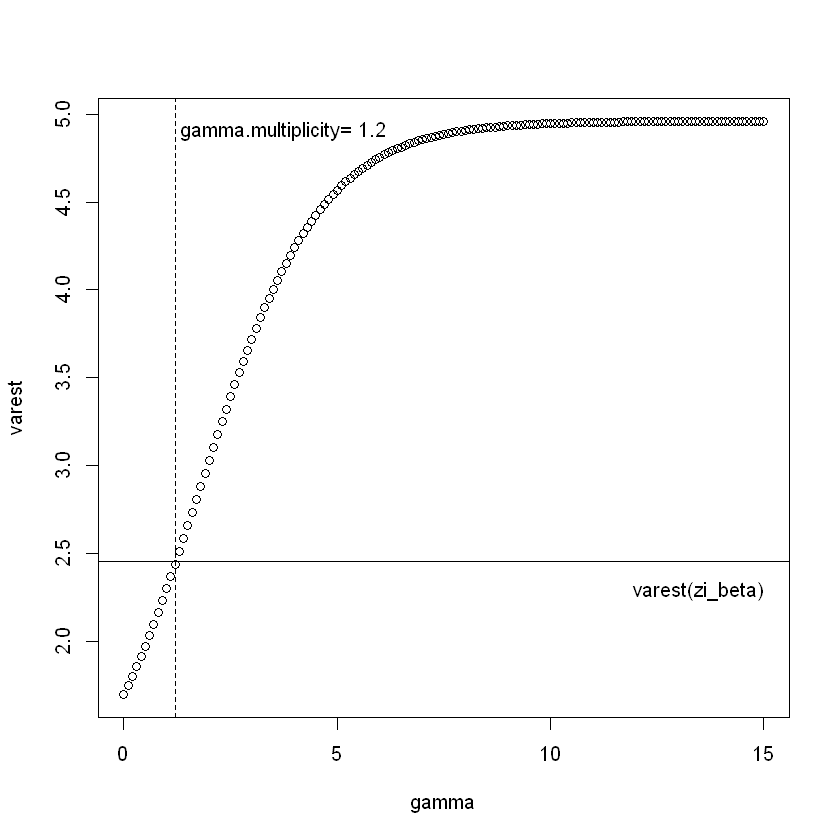

In [39]:
# Variance estimates of zi_alpha for different choices of gamma
max.gamma <- 15
range.gamma <- seq(0,max.gamma,by=0.1)
varest_gamma <- NULL
for(tmp.gamma in range.gamma){tmp <- mainLISBecker(gstar, coefgamma=tmp.gamma,probi=pi,showcat = FALSE)$varest
varest_gamma <- c(varest_gamma,tmp)                       }
# Gamma value which gives minimum variance
par(mfrow=c(1,1),xpd=FALSE)
plot(range.gamma,varest_gamma,xlab='gamma',ylab='varest')
varest_multiplicity <- mainLISBecker(gstar,coefgamma=tmp.gamma,probi=pi,multiplicity = TRUE, showcat = FALSE)$varest
abline(h=varest_multiplicity)
text(max.gamma*0.90,varest_multiplicity *0.98,label='varest(zi_beta)',pos=1)
gamma.multiplicity <- range.gamma[which(abs(varest_gamma-varest_multiplicity)==min(abs(varest_gamma-varest_multiplicity)))]
abline(v=gamma.multiplicity,lty=2)
text(gamma.multiplicity*1.1,max(varest_gamma)*0.99,label=paste('gamma.multiplicity=',gamma.multiplicity),adj=0)
mainLISBecker(gstar,gamma.multiplicity,probi=pi)
mainLISBecker(gstar,probi=pi,multiplicity=TRUE)